In [16]:
import csv
import time


print('=='*40)
print(' '*7+'2019년 1월 시간별 승하차 인원이 가장 많은 역을 찾는 프로그램입니다.')
print('=='*40)
time.sleep(1)

class Station() :
    
    # 시간대를 입력하는 함수
    def input_time(self, text) :
        while True :
            t = input('\n * 몇시에 {} 인원이 가장 많은 역을 찾으시나요? '.format(text))
            if not t.isdecimal() : # 입력 받은 값이 숫자가 아닐 때
                print('0~23 사이의 숫자를 입력해주세요.\n')
                continue
            else : # 입력 받은 값이 숫자 일 때
                t = int(t) 
                if t > 23 or t < 0 :
                    print('0~23 사이의 숫자를 입력해주세요.\n')
                    continue
                else :
                    break

        return t
    
    # 프로그램을 계속 실행할 것인지 묻는 함수
    def continue_system(self) :
        while True :
            answer = input('프로그램을 계속 실행하시겠습니까? [Y, N] ')
            if answer.upper() == 'Y' :
                return True
            elif answer.upper() == 'N' :
                return False
            else :
                print('Y와 N 중에 입력해주세요.\n')
                continue
               
    # 입력 받은 시간대의 인덱스를 찾는 함수
    def find_index(self, t) :
        file = open('subwaytime.csv')
        time_find_data = csv.reader(file)
        data = csv.reader(file)
        
        subway_time = next(data)
        on_off = next(data)

        find_time = []

        for i in range(len(subway_time)) :
            value = subway_time[i].split(':')[0]
            if value.isdecimal() :
                value = int(value)
            find_time.append(value)
        
        for i in range(len(find_time)) :
            if t == find_time[i] :
                num = i
        
        return num
                
class HourlyOnMaxStation(Station) :    

    # 인스턴스 선언할 때 초기화되는 값들
    def __init__(self) :
        print('\n----- 승차 인원이 가장 많은 역을 찾는 프로그램을 시작합니다. -----')
        self.on = '승차'
        self.t = super().input_time(self.on)
        self.num = super().find_index(self.t)

    # csv 파일을 열어 원하는 데이터를 추출하기 위한 함수
    def open_csv(self, num) :
        file = open('subwaytime.csv')
        data = csv.reader(file)

        time = next(data)
        on_off = next(data)

        mx = 0
        mx_station = ''
        
        for row in data :
            row[4:] = map(int, row[4:])
            value = row[num]
            if value > mx :
                mx = value
                mx_station = row[3]+'('+row[1]+')'

                
        file.close()
        return mx, mx_station

    # 결과 출력
    def __str__(self) :
        mx, mx_station = self.open_csv(self.num)
        text = '\n{}시에 승차 인원이 가장 많은 역은 {} 입니다\n'.format(self.t, mx_station)
        text = text + '승차 인원은 {:,}명 입니다.\n'.format(mx)
        return text
        
class HourlyOffMaxStation(Station) :

    # 인스턴스 선언할 때 초기화되는 값들
    def __init__(self) :
        print('\n'+ '-'*14+' 하차 인원이 가장 많은 역을 찾는 프로그램을 시작합니다. '+'-'*14)
        print()
        self.off = '하차'
        self.t = super().input_time(self.off)
        self.num = super().find_index(self.t)
        
        
    # csv 파일을 열어 원하는 데이터를 추출하기 위한 함수
    def open_csv(self, num) :
        file = open('subwaytime.csv')
        data = csv.reader(file)

        time = next(data)
        on_off = next(data)

        mx = 0
        mx_station = ''
        
        for row in data :
            row[4:] = map(int, row[4:])
            value = row[num+1]
            if value > mx :
                mx = value
                mx_station = row[3]+'('+row[1]+')'
                
        file.close()
        return mx, mx_station

    # 결과 출력
    def __str__(self) :
        mx, mx_station = self.open_csv(self.num)
        text = '\n{}시에 하차 인원이 가장 많은 역은 {} 입니다.\n'.format(self.t, mx_station)
        text = text + '하차 인원은 {:,}명 입니다.\n'.format(mx)
        return text
    
while True :
    answer = input('1.승차 Max \t 2. 하차 Max  ->  ')
    if not answer.isdecimal() :
        print('1과 2중 숫자를 선택해 입력해주세요.\n')
        continue
    else :
        answer = int(answer)
        if answer == 1 or answer == 2 :
            if answer == 1 :
                station = HourlyOnMaxStation()
                print(station)
            elif answer == 2 :
                station = HourlyOffMaxStation()
                print(station)
            if station.continue_system() :
                print()
                continue
            else :
                print('\n프로그램을 종료합니다.')
                break
        else :
            print('1과 2중 숫자를 선택해 입력해주세요.\n')
            continue


       2019년 1월 시간별 승하차 인원이 가장 많은 역을 찾는 프로그램입니다.
1.승차 Max 	 2. 하차 Max  ->  2

-------------- 하차 인원이 가장 많은 역을 찾는 프로그램을 시작합니다. --------------


 * 몇시에 하차 인원이 가장 많은 역을 찾으시나요? 3

3시에 하차 인원이 가장 많은 역은  입니다.
하차 인원은 0명 입니다.

프로그램을 계속 실행하시겠습니까? [Y, N] y

1.승차 Max 	 2. 하차 Max  ->  2

-------------- 하차 인원이 가장 많은 역을 찾는 프로그램을 시작합니다. --------------


 * 몇시에 하차 인원이 가장 많은 역을 찾으시나요? 1

1시에 하차 인원이 가장 많은 역은 서울대입구(관악구청)(2호선) 입니다.
하차 인원은 4,456명 입니다.

프로그램을 계속 실행하시겠습니까? [Y, N] y

1.승차 Max 	 2. 하차 Max  ->  2

-------------- 하차 인원이 가장 많은 역을 찾는 프로그램을 시작합니다. --------------


 * 몇시에 하차 인원이 가장 많은 역을 찾으시나요? 2

2시에 하차 인원이 가장 많은 역은 성신여대입구(돈암)(4호선) 입니다.
하차 인원은 4명 입니다.

프로그램을 계속 실행하시겠습니까? [Y, N] y

1.승차 Max 	 2. 하차 Max  ->  4
1과 2중 숫자를 선택해 입력해주세요.

1.승차 Max 	 2. 하차 Max  ->  2

-------------- 하차 인원이 가장 많은 역을 찾는 프로그램을 시작합니다. --------------


 * 몇시에 하차 인원이 가장 많은 역을 찾으시나요? 4

4시에 하차 인원이 가장 많은 역은 부평(경인선) 입니다.
하차 인원은 106명 입니다.

프로그램을 계속 실행하시겠습니까? [Y, N] n

프로그램을 종료합니다.



===== 원하는 프로그램을 입력해주세요 =====
1. 시간대별 승차 통계
2. 시간대별 하차 통계
3. 시간대별 승하차 인원 추이
4. 프로그램 종료
번호 선택 -> 5
1~4번 사이의 숫자를 입력해주세요.


===== 원하는 프로그램을 입력해주세요 =====
1. 시간대별 승차 통계
2. 시간대별 하차 통계
3. 시간대별 승하차 인원 추이
4. 프로그램 종료
번호 선택 -> -1
1~4번 사이의 숫자를 입력해주세요.


===== 원하는 프로그램을 입력해주세요 =====
1. 시간대별 승차 통계
2. 시간대별 하차 통계
3. 시간대별 승하차 인원 추이
4. 프로그램 종료
번호 선택 -> 안녕
1~4번 사이의 숫자를 입력해주세요.


===== 원하는 프로그램을 입력해주세요 =====
1. 시간대별 승차 통계
2. 시간대별 하차 통계
3. 시간대별 승하차 인원 추이
4. 프로그램 종료
번호 선택 -> 1

원하는 메뉴를 선택해주세요.
1. 그래프로 보기
2. 텍스트 형식으로 보기
번호 선택 -> 1


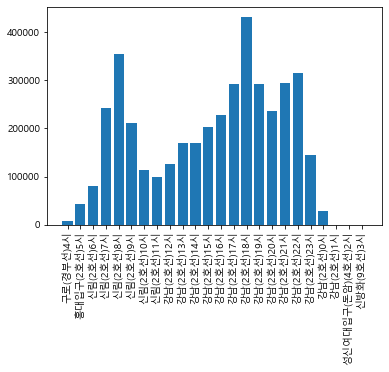


===== 원하는 프로그램을 입력해주세요 =====
1. 시간대별 승차 통계
2. 시간대별 하차 통계
3. 시간대별 승하차 인원 추이
4. 프로그램 종료
번호 선택 -> 1

원하는 메뉴를 선택해주세요.
1. 그래프로 보기
2. 텍스트 형식으로 보기
번호 선택 -> 3
1~2번 사이의 숫자를 입력해주세요.


원하는 메뉴를 선택해주세요.
1. 그래프로 보기
2. 텍스트 형식으로 보기
번호 선택 -> 안녕
1~2번 사이의 숫자를 입력해주세요.


원하는 메뉴를 선택해주세요.
1. 그래프로 보기
2. 텍스트 형식으로 보기
번호 선택 -> 2
========== 2019년 1월 시간별 승차 통계 ==========
4시에 승차가 가장 많은 역은 구로(경부선)4시이고 그 값은 8,418명 입니다.
5시에 승차가 가장 많은 역은 홍대입구(2호선)5시이고 그 값은 42,966명 입니다.
6시에 승차가 가장 많은 역은 신림(2호선)6시이고 그 값은 80,407명 입니다.
7시에 승차가 가장 많은 역은 신림(2호선)7시이고 그 값은 243,083명 입니다.
8시에 승차가 가장 많은 역은 신림(2호선)8시이고 그 값은 355,172명 입니다.
9시에 승차가 가장 많은 역은 신림(2호선)9시이고 그 값은 211,286명 입니다.
10시에 승차가 가장 많은 역은 신림(2호선)10시이고 그 값은 113,830명 입니다.
11시에 승차가 가장 많은 역은 신림(2호선)11시이고 그 값은 98,765명 입니다.
12시에 승차가 가장 많은 역은 강남(2호선)12시이고 그 값은 126,159명 입니다.
13시에 승차가 가장 많은 역은 강남(2호선)13시이고 그 값은 170,216명 입니다.
14시에 승차가 가장 많은 역은 강남(2호선)14시이고 그 값은 169,097명 입니다.
15시에 승차가 가장 많은 역은 강남(2호선)15시이고 그 값은 203,483명 입니다.
16시에 승차가 가장 많은 역은 강남(2호선)16시이고 그 값은 227,268명 입니다.
17시에 승차가 가장 많은 역은 강

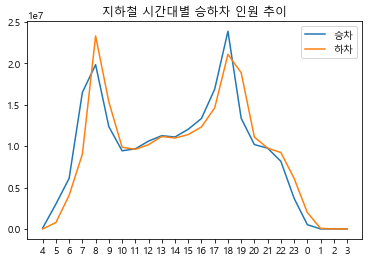


===== 원하는 프로그램을 입력해주세요 =====
1. 시간대별 승차 통계
2. 시간대별 하차 통계
3. 시간대별 승하차 인원 추이
4. 프로그램 종료
번호 선택 -> 3

원하는 메뉴를 선택해주세요.
1. 그래프로 보기
2. 텍스트 형식으로 보기
번호 선택 -> 2
========== 2019년 1월 시간별 승하차 합계 통계 ==========
4시에 승차 인원의 합은 105,055명이고, 하차 인원의 합은 1,616명 입니다.
5시에 승차 인원의 합은 3,004,777명이고, 하차 인원의 합은 769,865명 입니다.
6시에 승차 인원의 합은 6,109,712명이고, 하차 인원의 합은 4,063,753명 입니다.
7시에 승차 인원의 합은 16,485,348명이고, 하차 인원의 합은 9,027,520명 입니다.
8시에 승차 인원의 합은 19,843,950명이고, 하차 인원의 합은 23,309,313명 입니다.
9시에 승차 인원의 합은 12,357,620명이고, 하차 인원의 합은 15,352,447명 입니다.
10시에 승차 인원의 합은 9,438,699명이고, 하차 인원의 합은 9,873,017명 입니다.
11시에 승차 인원의 합은 9,673,116명이고, 하차 인원의 합은 9,611,044명 입니다.
12시에 승차 인원의 합은 10,609,249명이고, 하차 인원의 합은 10,183,646명 입니다.
13시에 승차 인원의 합은 11,262,850명이고, 하차 인원의 합은 11,171,310명 입니다.
14시에 승차 인원의 합은 11,106,713명이고, 하차 인원의 합은 10,979,461명 입니다.
15시에 승차 인원의 합은 12,041,962명이고, 하차 인원의 합은 11,400,318명 입니다.
16시에 승차 인원의 합은 13,343,105명이고, 하차 인원의 합은 12,321,795명 입니다.
17시에 승차 인원의 합은 16,889,514명이고, 하차 인원의 합은 14,629,199명 입니다.
18시에 승차 인원의 합은 23,883,151명이고, 

In [25]:
import csv
import matplotlib.pyplot as plt

def open_csv() :
    file = open('subwaytime.csv')
    data = csv.reader(file)

    time = next(data)
    on_off = next(data)

    s_in = [0] * 24 # 승차인원 합계
    s_out = [0] * 24 # 하차인원 합계
    
    mx = [0] * 24 # 시간대별 가장 많은 승차 값 저장할 리스트
    mx_station = [''] * 24 # 시간대별 가장 많은 승차 역 저장할 리스트
    
    
    mn = [100] * 24 # 시간대별 가장 많은 하차 값 저장할 리스트
    mn_station = [''] * 24 # 시간대별 가장 많은 하차 역 저장할 리스트
    
    for row in data :
        row[4:] = map(int, row[4:])
        for i in range(24) :
            on_result = row[i*2+4]
            off_result = row[i*2+5]
            s_in[i] +=row[2*i+4]
            s_out[i] +=row[2*i+5]
            if on_result > mx[i] :
                mx[i] = on_result
                mx_station[i] = row[3] + '(' + row[1] + ')' + str((i+4)%24) + '시'
            if off_result > mn[i] :
                mn[i] = off_result
                mn_station[i] = row[3] + '(' + row[1] + ')' + str((i+4)%24) + '시'

    time_list = []
    for i in range(24) :
        time_list.append((i+4)%24)
    file.close()
    
    return s_in, s_out, mx,mx_station, mn, mn_station, time_list

def on_text_chcek(time_list, mx, mx_station) :    
    print('========== 2019년 1월 시간별 승차 통계 ==========')
    for i in range(24) :
        print('{}시에 승차가 가장 많은 역은 {}이고 그 값은 {:,}명 입니다.'.format( time_list[i],  mx_station[i], mx[i]))
        
def off_text_chcek(time_list, mn, mn_station) :    
    print('========== 2019년 1월 시간별 하차 통계 ==========')
    for i in range(24) :
        print('{}시에 하차가 가장 많은 역은 {}이고 그 값은 {:,}명 입니다.'.format( time_list[i],  mn_station[i], mn[i]))

def on_off_text_check(time_list, s_in, s_out) :
    print('========== 2019년 1월 시간별 승하차 합계 통계 ==========')
    for i in range(24) :
        print('{}시에 승차 인원의 합은 {:,}명이고, 하차 인원의 합은 {:,}명 입니다.'.format(time_list[i], s_in[i], s_out[i]))

def visual_plot(s_in, s_out, time_list) : # 꺽은선 그래프
    plt.rc('font', family='Malgun Gothic')
    # plt.figure(dpi=300)
    plt.title('지하철 시간대별 승하차 인원 추이')
    plt.plot(s_in, label= '승차')
    plt.plot(s_out, label= '하차')
    plt.legend()
    plt.xticks(range(24), time_list)
    plt.show()

def on_visual_bar(mx, mx_station) : # 막대 그래프
    # plt.figure(dpi=300)
    plt.rc('font', family='Malgun Gothic')
    plt.bar(range(24), mx)
    plt.xticks(range(24), mx_station, rotation=90)
    plt.show()
    
def off_visual_bar(mn, mn_station) : # 막대 그래프
    # plt.figure(dpi=300)
    plt.rc('font', family='Malgun Gothic')
    plt.bar(range(24), mx)
    plt.xticks(range(24), mx_station, rotation=90)
    plt.show()
    

def choice_option() :
    option_text = '''
원하는 메뉴를 선택해주세요.
1. 그래프로 보기
2. 텍스트 형식으로 보기
번호 선택 -> '''
    
    while True :
        option = input(option_text)
        if not option.isdecimal() :
            print('1~2번 사이의 숫자를 입력해주세요.\n')
            continue
        else :
            option = int(option)
            if option == 1 :
                return 1
            elif option == 2 :
                return 2
            else :
                print('1~2번 사이의 숫자를 입력해주세요.\n')
                continue

while True :
    answer = input('''
===== 원하는 프로그램을 입력해주세요 =====
1. 시간대별 승차 통계
2. 시간대별 하차 통계
3. 시간대별 승하차 인원 추이
4. 프로그램 종료
번호 선택 -> ''')
    if not answer.isdecimal() :
        print('1~4번 사이의 숫자를 입력해주세요.\n')
        continue
    else :
        answer = int(answer)
        # csv파일에서 원하는 데이터 추출하기
        s_in, s_out, mx,mx_station, mn, mn_station, time_list = open_csv()
        if answer == 1 :
            if choice_option() == 1 :
                on_visual_bar(mx, mx_station)
            else :
                on_text_chcek(time_list, mx, mx_station)
                    
        elif answer == 2 :
            if choice_option() == 1 :
                off_visual_bar(mn, mn_station)
            else :
                off_text_chcek(time_list, mn, mn_station)
                    
        elif answer == 3 :
            if choice_option() == 1 :
                visual_plot(s_in, s_out, time_list)
            else :
                on_off_text_check(time_list, s_in, s_out)
                    
        elif answer == 4 :
            print('\n\n========== 프로그램을 종료합니다. ==========\n')
            break
        else :
            print('1~4번 사이의 숫자를 입력해주세요.\n')
            continue
                